# Singapore Airbnb

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


## Data Preprocessing

In [5]:
# Remove price outliers
q1 = df[['price']].quantile(0.25)
q3 = df[['price']].quantile(0.75)
iqr = q3 - q1
df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]

## EDA

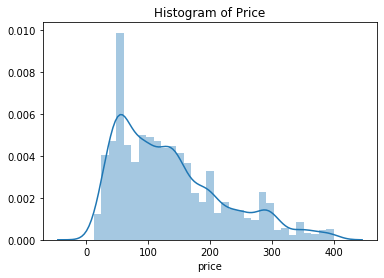

In [6]:
sns.distplot(df['price'])
plt.title("Histogram of Price")
plt.show()

In [4]:
y = df['price']
removed_outliers_bool = y.between(y.quantile(.05), y.quantile(.95))
removed_outliers = df[removed_outliers_bool]
removed_outliers.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


## Plot of Airbnb Locations

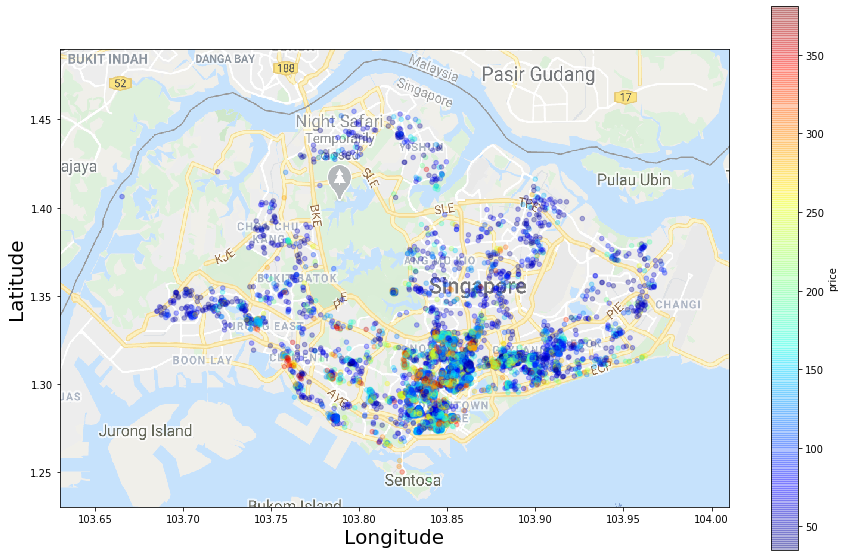

In [44]:
# import our image 
singapore_img = plt.imread('map.png')

# plot the data
ax = removed_outliers.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(15,10),
    c="price", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    sharex=False,
    alpha=0.3
)
# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.63,104.01,1.23,1.49], alpha=0.75)            
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)

# set the min/max axis values - these must be the same as above
plt.ylim(1.23, 1.49)
plt.xlim(103.63, 104.01)
plt.show()

# Using other map
# singapore_img = plt.imread('singapore_map.png')
# plt.imshow(singapore_img, extent=[103.5,104,1.15,1.50], alpha=0.5)            
# plt.ylim(1.15, 1.50)
# plt.xlim(103.5, 104)